In [1]:
# Import required packages here (after they are installed)
import numpy as np
import matplotlib.pyplot as mp
from pylab import show

# Load data. csv file should be in the same folder as the notebo ok for this to work, otherwise
# give data path.
data = np.loadtxt("data.csv")

In [2]:
#shuffle the data and select training and test data
np.random.seed(100) 
np.random.shuffle(data)

features = [] 
digits = []

for row in data:
#import the data and select only the 1's and 5's 
    if(row[0]==1 or row[0]==5):
        features.append(row[1:]) 
        digits.append(str(row[0]))

#Select the proportion of data to use for training. #Notice that we have set aside 80% of the data for testing 
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain] 
testFeatures = features[numTrain:] 
trainDigits = digits[:numTrain] 
testDigits = digits[numTrain:]

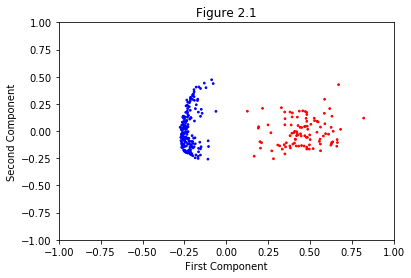

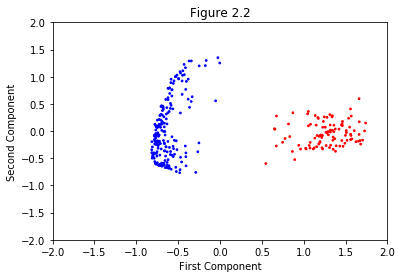

In [3]:
from sklearn.decomposition import KernelPCA

modelkpca_degree1 = KernelPCA(n_components=2, kernel='poly', degree=1)
newFeatures = modelkpca_degree1.fit_transform( trainFeatures, trainDigits)

X = []
Y = []
kpcaTrain = []

colors = []

for index in range( len( newFeatures)):
    X.append( newFeatures[ index][ 0])
    Y.append( newFeatures[ index][ 1])
    kpcaTrain.append( [ newFeatures[ index][ 0], newFeatures[ index][1]])

    if ( trainDigits[ index] == "1.0"):
        colors.append("b")
    else:
        colors.append("r")
    
    
#plot the data points
mp.scatter(X, Y, s = 3, c = colors)

#specify the axes
mp.xlim(-1,1) 
mp.xlabel("First Component") 
mp.ylim(-1,1) 
mp.ylabel("Second Component")
#label the figure
mp.title("Figure 2.1")
#display the current graph
show()




modelkpca_degree3 = KernelPCA(n_components=2, kernel='poly', degree=3)
newFeatures = modelkpca_degree3.fit_transform( trainFeatures, trainDigits)

X = []
Y = []
kpcaTrain = []

colors = []

for index in range( len( newFeatures)):
    X.append( newFeatures[ index][ 0])
    Y.append( newFeatures[ index][ 1])
    kpcaTrain.append( [ newFeatures[ index][ 0], newFeatures[ index][1]])
    if ( trainDigits[ index] == "1.0"):
        colors.append("b")
    else:
        colors.append("r")
    
    
#plot the data points
mp.scatter(X, Y, s = 3, c = colors)

#specify the axes
mp.xlim(-2,2) 
mp.xlabel("First Component") 
mp.ylim(-2,2) 
mp.ylabel("Second Component")
#label the figure
mp.title("Figure 2.2")
#display the current graph
show()

The features extracted using kpca seem to seperate the data significantly better than the "average intensity" and "intensity variance" features from homework 1. While the red and blue data points on the graph from using the homework 1 features were very close together, the red and blue data points from using the features extracted with kpca have a very clear separation.

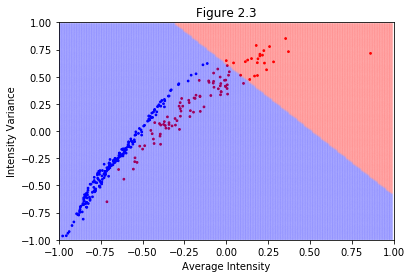

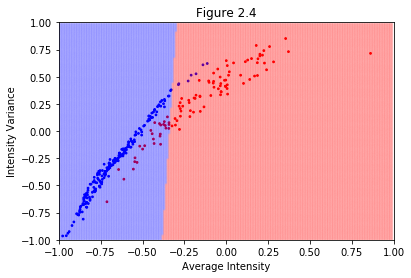

In [4]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")


from sklearn.linear_model import LogisticRegression

model = LogisticRegression( C = 0.01, solver = "liblinear")
model.fit( simpleTrain, trainDigits)


# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 2.3")

show()



model = LogisticRegression( C = 2, solver = "liblinear")
model.fit( simpleTrain, trainDigits)


# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 2.4")

show()

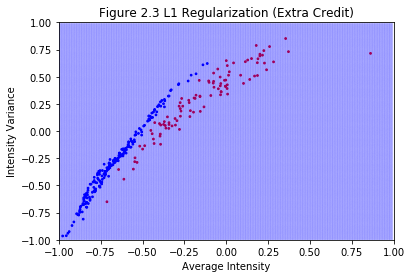

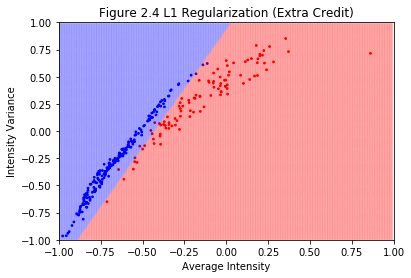

In [5]:
model = LogisticRegression( penalty = "l1", C = 0.01, solver = "liblinear")
model.fit( simpleTrain, trainDigits)


# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 2.3 L1 Regularization (Extra Credit)")

show()


model = LogisticRegression( penalty = "l1", C = 2, solver = "liblinear")
model.fit( simpleTrain, trainDigits)


# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 2.4 L1 Regularization (Extra Credit)")

show()

The L2 Regularization method seems to make it much more likely for the model to overfit the data. L1 vs L2 has a significant impact here. While the L2 regularization linear regression model seems to be underfitting the data here, the L1 regularization model seems to be doing a good job at fitting the data. I do not believe it suffers much from overfitting as it is not perfictly fit to the data nor are there any strange/outlier bubble regions. It seems to find a nice separation line between the data.

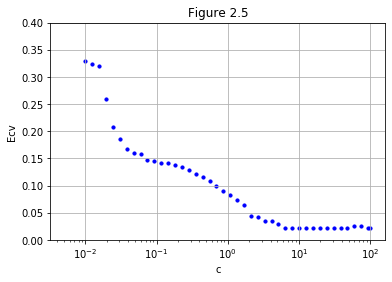

Lowest cv = 0.022479838709677423 at c = 94.03954806578301


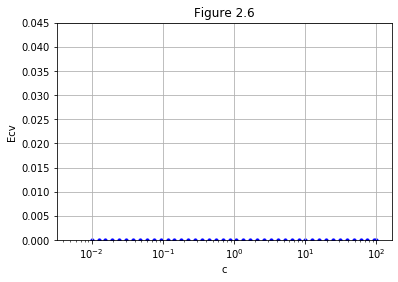

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

cross_val_scores = []

X_scale = []

for i in range( 1, 43):
    X_scale.append( np.power( 1.25, i) / 125)
X_scale.append( 100)
    

for i in X_scale:
    new_model = SVC( kernel = "linear", C = i)
    cross_val_scores.append( np.average(1 - cross_val_score( new_model, simpleTrain, trainDigits, cv = 10)))

# print(X_scale)
# print(cross_val_scores)

    
#Visualize Results
X_new = X_scale
Y_new = cross_val_scores

#plot the points
mp.scatter(X_new,Y_new,s=10,c="b")

#specify the axes
# mp.xlim(0,100)
mp.xlabel("c")
mp.ylim(0,0.4)
mp.ylabel("Ecv")

mp.xscale("log")
mp.grid()

#label the figure
mp.title("Figure 2.5")

#display the current graph
show()

print( "Lowest cv =", np.min( cross_val_scores), "at c =", X_scale[ np.argmin( cross_val_scores)])




cross_val_scores = []

for i in X_scale:
    new_model = SVC( kernel = "linear", C = i)
    cross_val_scores.append( np.average(1 - cross_val_score( new_model, trainFeatures, trainDigits, cv = 10)))

# print(X_scale)
# print(cross_val_scores)

    
#Visualize Results
X_new = X_scale
Y_new = cross_val_scores

#plot the points
mp.scatter(X_new,Y_new,s=10,c="b")

#specify the axes
# mp.xlim(0,100)
mp.xlabel("c")
mp.ylim(0,0.045)
mp.ylabel("Ecv")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Figure 2.6")

#display the current graph
show()

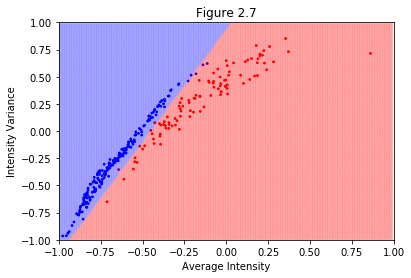

In [7]:
model = SVC( kernel = "linear", C = 94.0395)

model.fit( simpleTrain, trainDigits)


# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 2.7")

show()


In [8]:
cross_val_scores = [ [],[],[],[], [], [], []]

degrees = [2, 3, 4, 5, 6, 7, 8]

for x in range( len( degrees)):
    
    for i in X_scale:
        model = SVC( C = i, kernel = "poly", degree = degrees[ x])

        cross_val_scores[ x].append( np.average(1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))
    
for i in range( len( degrees)):
    print( "Minimal cross validation error with kernel degree =", degrees[ i], "is at c =", X_scale[ np.argmin( cross_val_scores[ i])])
    print( "CVE =", np.min( cross_val_scores[ i]))
    
# print( cross_val_scores)
# print( X_scale)



Minimal cross validation error with kernel degree = 2 is at c = 60.185310762101125
CVE = 0.0063508064516129
Minimal cross validation error with kernel degree = 3 is at c = 4.135903062765138
CVE = 0.0032258064516129
Minimal cross validation error with kernel degree = 4 is at c = 3.3087224502121106
CVE = 0.0063508064516129
Minimal cross validation error with kernel degree = 5 is at c = 1.3552527156068803
CVE = 0.0032258064516129
Minimal cross validation error with kernel degree = 6 is at c = 2.646977960169689
CVE = 0.0063508064516129
Minimal cross validation error with kernel degree = 7 is at c = 48.14824860968089
CVE = 0.006451612903225812
Minimal cross validation error with kernel degree = 8 is at c = 75.2316384526264
CVE = 0.003125


I used degree values of 2 through 8 because the original degree values would not finish running.

The optimal c value seems to decrease until reaching degree value of 5, after which the optimal c value seems to grow very fast. This behavior is interesting because I would expect the c value to continuously get smaller as the the degree of the kernel increases.

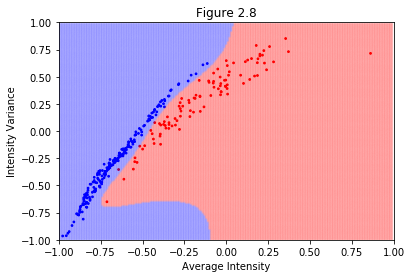

In [9]:
model = SVC( kernel = "poly", C = 1.355, degree = 5)

model.fit( simpleTrain, trainDigits)


# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 2.8")

show()

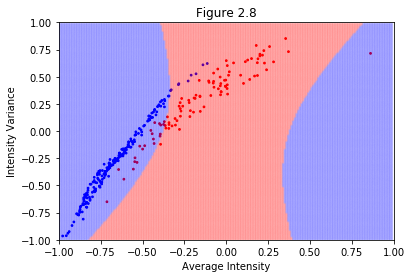

In [10]:
model = SVC( kernel = "poly", C = 0.1, degree = 2)

model.fit( simpleTrain, trainDigits)


# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
            
            
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#label the figure
mp.title("Figure 2.8")

show()

I believe degree 5 and c value 1.355 finds the best fit for the model. Although at first glance, this model may appear to be sufferring from overfitting, analyzing the cross validation errors presented earlier demonstrate that this model actually performs with the most accuracy. Therefore, this is the best fit for the model.

In [11]:
print("gamma = 0.1")
cross_val_scores = [ [],[],[],[] ]

degrees = [2, 3, 4, 5]

for x in range( len( degrees)):
    
    for i in X_scale:
        model = SVC( C = i, gamma = 0.1, degree = degrees[ x])

        cross_val_scores[ x].append( np.average(1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))
    
for i in range( len( degrees)):
    print( "Minimal cross validation error with kernel degree =", degrees[ i], "is at c =", X_scale[ np.argmin( cross_val_scores[ i])])
    print( "CVE =", np.min( cross_val_scores[ i]))

    
    
print("gamma = 1")
cross_val_scores = [ [],[],[],[] ]

degrees = [2, 3, 4, 5]

for x in range( len( degrees)):
    
    for i in X_scale:
        model = SVC( C = i, gamma = 1, degree = degrees[ x])

        cross_val_scores[ x].append( np.average(1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))
    
for i in range( len( degrees)):
    print( "Minimal cross validation error with kernel degree =", degrees[ i], "is at c =", X_scale[ np.argmin( cross_val_scores[ i])])
    print( "CVE =", np.min( cross_val_scores[ i]))


    

print("gamma = 10")
cross_val_scores = [ [],[],[],[] ]

degrees = [2, 3, 4, 5]

for x in range( len( degrees)):
    
    for i in X_scale:
        model = SVC( C = i, gamma = 10, degree = degrees[ x])

        cross_val_scores[ x].append( np.average(1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))
    
for i in range( len( degrees)):
    print( "Minimal cross validation error with kernel degree =", degrees[ i], "is at c =", X_scale[ np.argmin( cross_val_scores[ i])])
    print( "CVE =", np.min( cross_val_scores[ i]))
    
    
print("gamma = 100")
cross_val_scores = [ [],[],[],[] ]

degrees = [2, 3, 4, 5]

for x in range( len( degrees)):
    
    for i in X_scale:
        model = SVC( C = i, gamma = 100, degree = degrees[ x])

        cross_val_scores[ x].append( np.average(1 - cross_val_score( model, simpleTrain, trainDigits, cv = 10)))
    
for i in range( len( degrees)):
    print( "Minimal cross validation error with kernel degree =", degrees[ i], "is at c =", X_scale[ np.argmin( cross_val_scores[ i])])
    print( "CVE =", np.min( cross_val_scores[ i]))



gamma = 0.1
Minimal cross validation error with kernel degree = 2 is at c = 94.03954806578301
CVE = 0.0064516129032258
Minimal cross validation error with kernel degree = 3 is at c = 94.03954806578301
CVE = 0.0064516129032258
Minimal cross validation error with kernel degree = 4 is at c = 94.03954806578301
CVE = 0.0064516129032258
Minimal cross validation error with kernel degree = 5 is at c = 94.03954806578301
CVE = 0.0064516129032258
gamma = 1
Minimal cross validation error with kernel degree = 2 is at c = 12.621774483536187
CVE = 0.0064516129032258
Minimal cross validation error with kernel degree = 3 is at c = 12.621774483536187
CVE = 0.0064516129032258
Minimal cross validation error with kernel degree = 4 is at c = 12.621774483536187
CVE = 0.0064516129032258
Minimal cross validation error with kernel degree = 5 is at c = 12.621774483536187
CVE = 0.0064516129032258
gamma = 10
Minimal cross validation error with kernel degree = 2 is at c = 94.03954806578301
CVE = 0.0032258064516129


Gamma does not seem to signficantly impact the minimal cross validation error. However, it does seem to significantly impact the optimal value of c. As gamma grows, the optimal value of c seems to decrease signficantly, though it may jump back up at some gamma values, but the minimal cross validation error does not decrease with the c value.